# REPRESENTATION

### IMPORT DEPENDENCIES

In [25]:
# IMPORT DEPENDENCIES
# FOR DATA
import pandas as pd
import os
import csv
import math
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import sem
from scipy.stats import linregress
import random
# import requests
# import datefinder

# # FOR SQL LITE
# from sqlalchemy import create_engine
# from datetime import date

In [26]:
# IMPORTING DATA
path1 = os.path.join('data',f'CountriesPopulation_v1.csv')
path2 = os.path.join('data',f'OECD_Countries.csv')
path3 = os.path.join('data',f'Large_Countries.csv')
path4 = os.path.join('data',f'USStatesCongressionalSeats.csv')
path5 = os.path.join('data',f'USStatesCongressionalSeatsHistory.csv')
path6 = os.path.join('data',f'USStatesPopulation.csv')
path7 = os.path.join('data',f'USStatesPopulationHistoric.csv')

In [27]:
# CONVERTING TO DATAFRAMES
CountriesPopulation_df = pd.read_csv(path1, encoding = "ISO-8859-1")
OECD_Countries_df = pd.read_csv(path2, encoding = "ISO-8859-1")
Large_Countries_df = pd.read_csv(path3, encoding = "ISO-8859-1")
USStatesCongressionalSeats_df = pd.read_csv(path4, encoding = "ISO-8859-1")
USStatesCongressionalSeatsHistory_df = pd.read_csv(path5, encoding = "ISO-8859-1")
USStatesPopulation_df = pd.read_csv(path6, encoding = "ISO-8859-1")
USStatesPopulationHistoric_df = pd.read_csv(path7, encoding = "ISO-8859-1")

In [28]:
CountriesPopulation_df.head()

,Country,Population,countrycode_2,countrycode,Independent
0,Afghanistan,32890171.0,AF,AFG,Yes
1,Åland Islands (Finland),30152.0,AX,ALA,No
2,Albania,2845955.0,AL,ALB,Yes
3,Algeria,44700000.0,DZ,DZA,Yes
4,American Samoa (US),56951.0,AS,ASM,No


### PART 1A REPRESENTATION US VS OECD COUNTRIES

In [29]:

# Combine the data into a single dataset
OECDCountriesPopCongressionalSeats_df = pd.merge(CountriesPopulation_df, OECD_Countries_df, how='left', on='countrycode')

# Getting rid of columns we don't need
OECDCountriesPopCongressionalSeats_df = OECDCountriesPopCongressionalSeats_df[['Country', 'countrycode', 'Population', 'federal representatives', 'upper house']]

# Renaming columns
OECDCountriesPopCongressionalSeats_df = OECDCountriesPopCongressionalSeats_df.rename(columns={'federal representatives': 'federal representatives', 'upper house': 'upper house'})

# Remove any blanks, reset
OECDCountriesPopCongressionalSeats_df = OECDCountriesPopCongressionalSeats_df.dropna(how='any')
OECDCountriesPopCongressionalSeats_df.reset_index()
OECDCountriesPopCongressionalSeats_df
# print(CountriesPopulationCongressionalSeats_df.dtypes)

# Convert object to numeric
OECDCountriesPopCongressionalSeats_df['Population'] = OECDCountriesPopCongressionalSeats_df['Population'].apply(pd.to_numeric, errors='coerce')

# Round numbers
OECDCountriesPopCongressionalSeats_df['Population'] = round(OECDCountriesPopCongressionalSeats_df['Population'], 0)
OECDCountriesPopCongressionalSeats_df['federal representatives'] = round(OECDCountriesPopCongressionalSeats_df['federal representatives'], 0)
OECDCountriesPopCongressionalSeats_df['upper house'] = round(OECDCountriesPopCongressionalSeats_df['upper house'], 0)


print(OECDCountriesPopCongressionalSeats_df.dtypes)
OECDCountriesPopCongressionalSeats_df.head()

Country                     object
countrycode                 object
Population                 float64
federal representatives    float64
upper house                float64
dtype: object


,Country,countrycode,Population,federal representatives,upper house
12,Australia,AUS,25776464.0,151.0,76.0
13,Austria,AUT,8933346.0,183.0,61.0
20,Belgium,BEL,11556297.0,150.0,60.0
36,Canada,CAN,38411882.0,338.0,105.0
41,Chile,CHL,19678363.0,155.0,43.0


In [30]:

for index, row in OECDCountriesPopCongressionalSeats_df.iterrows():
    OECDCountriesPopCongressionalSeats_df.loc[index,"lower_house per head"] = row["Population"] / row["federal representatives"]
    if OECDCountriesPopCongressionalSeats_df.loc[index,"upper house"] > 0:
        OECDCountriesPopCongressionalSeats_df.loc[index,"upper_house per head"] = row["Population"] / row["upper house"]
    

# Round numbers
OECDCountriesPopCongressionalSeats_df['Population'] = round(OECDCountriesPopCongressionalSeats_df['Population'], 0)
OECDCountriesPopCongressionalSeats_df['lower_house per head'] = round(OECDCountriesPopCongressionalSeats_df['lower_house per head'], 0)
OECDCountriesPopCongressionalSeats_df['upper_house per head'] = round(OECDCountriesPopCongressionalSeats_df['upper_house per head'], 0)

OECDCountriesPopCongressionalSeats_df.head()

,Country,countrycode,Population,federal representatives,upper house,lower_house per head,upper_house per head
12,Australia,AUS,25776464.0,151.0,76.0,170705.0,339164.0
13,Austria,AUT,8933346.0,183.0,61.0,48816.0,146448.0
20,Belgium,BEL,11556297.0,150.0,60.0,77042.0,192605.0
36,Canada,CAN,38411882.0,338.0,105.0,113645.0,365827.0
41,Chile,CHL,19678363.0,155.0,43.0,126957.0,457636.0


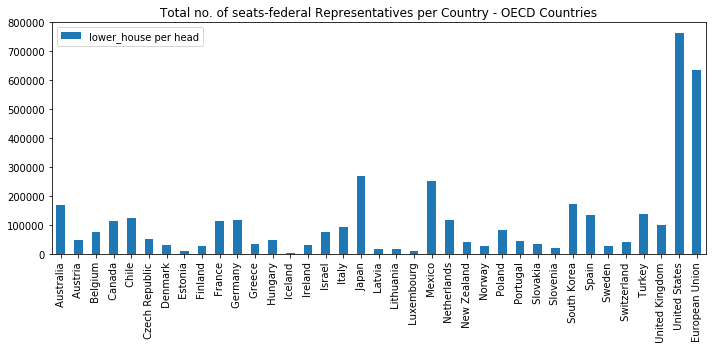

In [31]:
# GENERATE BAR PLOT FOR LOWER HOUSE
# Getting rid of columns we don't need
CountryvsSeats_LowerHouse_df = OECDCountriesPopCongressionalSeats_df[['Country', 'lower_house per head']]
# Create x-axis
Country_List = CountryvsSeats_LowerHouse_df['Country'].unique()
CountryNo = np.array(range(len(Country_List)))

# Create Plot Method 1 (pandasplot)
CountryvsSeats_LowerHouse_df.plot(kind="bar", figsize=(10,5))
plt.title("Total no. of seats-federal Representatives per Country - OECD Countries")
plt.xticks(CountryNo, Country_List,rotation = 90)
plt.tight_layout()
plt.show()


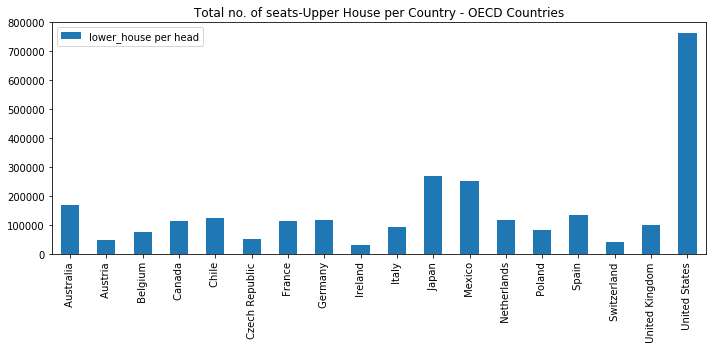

In [32]:
# GENERATE BAR PLOT FOR UPPER HOUSE
# Getting rid of columns we don't need
UpperHouse_df = OECDCountriesPopCongressionalSeats_df[OECDCountriesPopCongressionalSeats_df['upper house']>0] 
CountryvsSeats_UpperHouse_df = UpperHouse_df[['Country', 'lower_house per head']]
# Create x-axis
Country_List = CountryvsSeats_UpperHouse_df['Country'].unique()
CountryNo = np.array(range(len(Country_List)))

# Create Plot Method 1 (pandasplot)
CountryvsSeats_UpperHouse_df.plot(kind="bar", figsize=(10,5))
plt.title("Total no. of seats-Upper House per Country - OECD Countries")
plt.xticks(CountryNo, Country_List,rotation = 90)
plt.tight_layout()
plt.show()

#### PART 1B: REPRESENTATION US VS RANDOM COUNTRIES

In [33]:

# Combine the data into a single dataset
CountriesPopulationCongressionalSeats_df = pd.merge(CountriesPopulation_df, Large_Countries_df, how='left', on='countrycode')

# Getting rid of columns we don't need
CountriesPopulationCongressionalSeats_df = CountriesPopulationCongressionalSeats_df[['Country', 'countrycode', 'Population_x', 'Federal Representatives', 'Upper house']]

# Renaming columns
CountriesPopulationCongressionalSeats_df = CountriesPopulationCongressionalSeats_df.rename(columns={'Population_x': 'Population', 'Federal Representatives': 'federal representatives', 'Upper house': 'upper house'})

# Remove any blanks, reset
CountriesPopulationCongressionalSeats_df = CountriesPopulationCongressionalSeats_df.dropna(how='any')
CountriesPopulationCongressionalSeats_df.reset_index()
CountriesPopulationCongressionalSeats_df
# print(CountriesPopulationCongressionalSeats_df.dtypes)

# Convert object to numeric
CountriesPopulationCongressionalSeats_df['Population'] = CountriesPopulationCongressionalSeats_df['Population'].apply(pd.to_numeric, errors='coerce')

# Round numbers
CountriesPopulationCongressionalSeats_df['Population'] = round(CountriesPopulationCongressionalSeats_df['Population'], 0)
CountriesPopulationCongressionalSeats_df['federal representatives'] = round(CountriesPopulationCongressionalSeats_df['federal representatives'], 0)
CountriesPopulationCongressionalSeats_df['upper house'] = round(CountriesPopulationCongressionalSeats_df['upper house'], 0)


print(CountriesPopulationCongressionalSeats_df.dtypes)
CountriesPopulationCongressionalSeats_df.head()

# CountriesPopulation_df
# Large_Countries_df

Country                     object
countrycode                 object
Population                 float64
federal representatives    float64
upper house                float64
dtype: object


,Country,countrycode,Population,federal representatives,upper house
3,Algeria,DZA,44700000.0,462.0,144.0
8,Antigua and Barbuda,ATG,99337.0,17.0,17.0
9,Argentina,ARG,45808747.0,257.0,72.0
15,Bahamas,BHS,393450.0,39.0,16.0
16,Bahrain,BHR,1501635.0,40.0,40.0


In [34]:

for index, row in CountriesPopulationCongressionalSeats_df.iterrows():
    CountriesPopulationCongressionalSeats_df.loc[index,"lower_house per head"] = row["Population"] / row["federal representatives"]
    if CountriesPopulationCongressionalSeats_df.loc[index,"upper house"] > 0:
        CountriesPopulationCongressionalSeats_df.loc[index,"upper_house per head"] = row["Population"] / row["upper house"]
    

# Round numbers
CountriesPopulationCongressionalSeats_df['Population'] = round(CountriesPopulationCongressionalSeats_df['Population'], 0)
CountriesPopulationCongressionalSeats_df['lower_house per head'] = round(CountriesPopulationCongressionalSeats_df['lower_house per head'], 0)
CountriesPopulationCongressionalSeats_df['upper_house per head'] = round(CountriesPopulationCongressionalSeats_df['upper_house per head'], 0)

CountriesPopulationCongressionalSeats_df.head()

,Country,countrycode,Population,federal representatives,upper house,lower_house per head,upper_house per head
3,Algeria,DZA,44700000.0,462.0,144.0,96753.0,310417.0
8,Antigua and Barbuda,ATG,99337.0,17.0,17.0,5843.0,5843.0
9,Argentina,ARG,45808747.0,257.0,72.0,178244.0,636233.0
15,Bahamas,BHS,393450.0,39.0,16.0,10088.0,24591.0
16,Bahrain,BHR,1501635.0,40.0,40.0,37541.0,37541.0


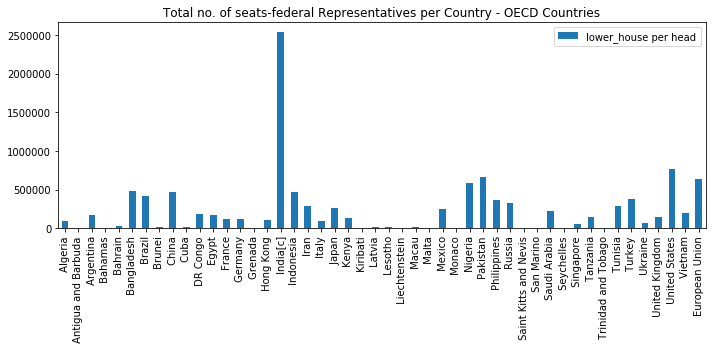

In [35]:
# GENERATE BAR PLOT FOR LOWER HOUSE
# Getting rid of columns we don't need
CountryvsSeats_LowerHouse_df = CountriesPopulationCongressionalSeats_df[['Country', 'lower_house per head']]
# Create x-axis
Country_List = CountryvsSeats_LowerHouse_df['Country'].unique()
CountryNo = np.array(range(len(Country_List)))

# Create Plot Method 1 (pandasplot)
CountryvsSeats_LowerHouse_df.plot(kind="bar", figsize=(10,5))
plt.title("Total no. of seats-federal Representatives per Country - OECD Countries")
plt.xticks(CountryNo, Country_List,rotation = 90)
plt.tight_layout()
plt.show()


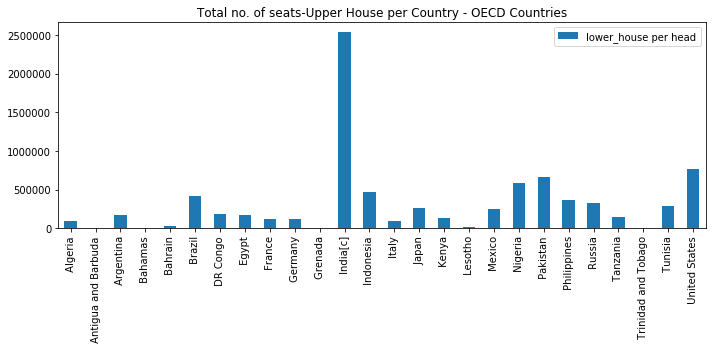

In [36]:
# GENERATE BAR PLOT FOR UPPER HOUSE
# Getting rid of columns we don't need
UpperHouse_df = CountriesPopulationCongressionalSeats_df[CountriesPopulationCongressionalSeats_df['upper house']>0] 
CountryvsSeats_UpperHouse_df = UpperHouse_df[['Country', 'lower_house per head']]
# Create x-axis
Country_List = CountryvsSeats_UpperHouse_df['Country'].unique()
CountryNo = np.array(range(len(Country_List)))

# Create Plot Method 1 (pandasplot)
CountryvsSeats_UpperHouse_df.plot(kind="bar", figsize=(10,5))
plt.title("Total no. of seats-Upper House per Country - OECD Countries")
plt.xticks(CountryNo, Country_List,rotation = 90)
plt.tight_layout()
plt.show()

### PART 2: US POPULATION HISTORY AND CONGRESSIONAL SEATS

In [49]:
USStatesPopulationHistoric_df

,State,Abbr,Year Admitted,1790_TotalPopulation,1800_TotalPopulation,1810_TotalPopulation,1820_TotalPopulation,1830_TotalPopulation,1840_TotalPopulation,1850_TotalPopulation,...,1940_TotalPopulation,1950_TotalPopulation,1960_TotalPopulation,1970_TotalPopulation,1980_TotalPopulation,1990_TotalPopulation,2000_TotalPopulation,2010_TotalPopulation,2020_TotalPopulation,density
0,Alabama,AL,1819.0,NaN,"1,250","9,046","127,901","309,527","590,756","771,623",...,"2,832,961","3,061,743","3,266,740","3,444,165","3,893,888","4,040,587","4,447,100","4,779,736","4,934,190.00",97.4270
1,Alaska,AK,1959.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"72,524","128,643","226,167","300,382","401,851","550,043","626,932","710,231","724,357.00",1.2694
2,Arizona,AZ,1912.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"499,261","749,587","1,302,161","1,770,900","2,718,215","3,665,228","5,130,632","6,392,017","7,520,100.00",66.2016
3,Arkansas,AR,1836.0,NaN,NaN,"1,062","14,273","30,388","97,574","209,897",...,"1,949,387","1,909,511","1,786,272","1,923,295","2,286,435","2,350,725","2,673,400","2,915,918","3,033,950.00",58.3059
4,California,CA,1850.0,NaN,NaN,NaN,NaN,NaN,NaN,"92,597",...,"6,907,387","10,586,223","15,717,204","19,953,134","23,667,902","29,760,021","33,871,648","37,253,956","39,613,500.00",254.2929
5,Colorado,CO,1876.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,123,296","1,325,089","1,753,947","2,207,259","2,889,964","3,294,394","4,301,261","5,029,196","5,893,630.00",56.8653
6,Connecticut,CT,1788.0,"237,946","251,002","262,042","275,202","297,675","309,978","370,792",...,"1,709,242","2,007,280","2,535,234","3,031,709","3,107,576","3,287,116","3,405,565","3,574,097","3,552,820.00",733.7505
7,Delaware,DE,1787.0,"59,096","64,273","72,674","72,749","76,748","78,085","91,532",...,"266,505","318,085","446,292","548,104","594,338","666,168","783,600","897,934","990,334.00",508.1242
8,District of Columbia,DC,1790.0,NaN,"8,144","15,471","23,336","30,261","33,745","51,687",...,"663,091","802,178","763,956","756,510","638,333","606,900","572,059","601,723","714,153.00",11707.4262
9,Florida,FL,1845.0,NaN,NaN,NaN,NaN,"34,730","54,477","87,445",...,"1,897,414","2,771,305","4,951,560","6,789,443","9,746,324","12,937,926","15,982,378","18,801,310","21,944,600.00",409.2233


In [56]:
# for index, row in USStatesPopulationHistoric_df.iterrows():
#     USStatesPopulationHistoric_df.loc[index,"1790_RepPopulation"] = row["1790_TotalPopulation"] +(0.60 * (row["1790_EnslavedPopulation"]))
# #     if CountriesPopulationCongressionalSeats_df.loc[index,"upper house"] != NaN:
# #         CountriesPopulationCongressionalSeats_df.loc[index,"upper_house per head"] = row["Population"] / row["upper house"]
# USStatesPopulationHistoric_df

# spare_df = USStatesPopulationHistoric_df
USStatesPopulationHistoric_df = spare_df
USStatesPopulationHistoric_df

# Remove NaN values
# USStatesPopulationHistoric_df.fillna(0)
USStatesPopulationHistoric_df.replace(np.nan,0)

# # Convert object to numeric
# USStatesPopulationHistoric_df['1790_TotalPopulation'] = USStatesPopulationHistoric_df['1790_TotalPopulation'].apply(pd.to_numeric, errors='coerce')
# USStatesPopulationHistoric_df['1800_TotalPopulation'] = USStatesPopulationHistoric_df['1800_TotalPopulation'].apply(pd.to_numeric, errors='coerce')
# USStatesPopulationHistoric_df['1810_TotalPopulation'] = USStatesPopulationHistoric_df['1810_TotalPopulation'].apply(pd.to_numeric, errors='coerce')
# USStatesPopulationHistoric_df['1820_TotalPopulation'] = USStatesPopulationHistoric_df['1820_TotalPopulation'].apply(pd.to_numeric, errors='coerce')
# USStatesPopulationHistoric_df['1830_TotalPopulation'] = USStatesPopulationHistoric_df['1830_TotalPopulation'].apply(pd.to_numeric, errors='coerce')
# USStatesPopulationHistoric_df['1840_TotalPopulation'] = USStatesPopulationHistoric_df['1840_TotalPopulation'].apply(pd.to_numeric, errors='coerce')
# USStatesPopulationHistoric_df['1850_TotalPopulation'] = USStatesPopulationHistoric_df['1850_TotalPopulation'].apply(pd.to_numeric, errors='coerce')
# USStatesPopulationHistoric_df['1860_TotalPopulation'] = USStatesPopulationHistoric_df['1860_TotalPopulation'].apply(pd.to_numeric, errors='coerce')
# USStatesPopulationHistoric_df['1790_EnslavedPopulation'] = USStatesPopulationHistoric_df['1790_EnslavedPopulation'].apply(pd.to_numeric, errors='coerce')
# USStatesPopulationHistoric_df['1800_EnslavedPopulation'] = USStatesPopulationHistoric_df['1800_EnslavedPopulation'].apply(pd.to_numeric, errors='coerce')
# USStatesPopulationHistoric_df['1810_EnslavedPopulation'] = USStatesPopulationHistoric_df['1810_EnslavedPopulation'].apply(pd.to_numeric, errors='coerce')
# USStatesPopulationHistoric_df['1820_EnslavedPopulation'] = USStatesPopulationHistoric_df['1820_EnslavedPopulation'].apply(pd.to_numeric, errors='coerce')
# USStatesPopulationHistoric_df['1830_EnslavedPopulation'] = USStatesPopulationHistoric_df['1830_EnslavedPopulation'].apply(pd.to_numeric, errors='coerce')
# USStatesPopulationHistoric_df['1840_EnslavedPopulation'] = USStatesPopulationHistoric_df['1840_EnslavedPopulation'].apply(pd.to_numeric, errors='coerce')
# USStatesPopulationHistoric_df['1850_EnslavedPopulation'] = USStatesPopulationHistoric_df['1850_EnslavedPopulation'].apply(pd.to_numeric, errors='coerce')
# USStatesPopulationHistoric_df['1860_EnslavedPopulation'] = USStatesPopulationHistoric_df['1860_EnslavedPopulation'].apply(pd.to_numeric, errors='coerce')

# # # USStatesPopulationHistoric_df = USStatesPopulationHistoric_df.dropna(how='any')
# # USStatesPopulationHistoric_df["1790_RepPopulation"] = USStatesPopulationHistoric_df["1790_TotalPopulation"] +(0.60 * (USStatesPopulationHistoric_df["1790_EnslavedPopulation"]))
# # USStatesPopulationHistoric_df["1800_RepPopulation"] = USStatesPopulationHistoric_df["1800_TotalPopulation"] +(0.60 * (USStatesPopulationHistoric_df["1800_EnslavedPopulation"]))
# # USStatesPopulationHistoric_df["1810_RepPopulation"] = USStatesPopulationHistoric_df["1810_TotalPopulation"] +(0.60 * (USStatesPopulationHistoric_df["1810_EnslavedPopulation"]))
# # USStatesPopulationHistoric_df["1820_RepPopulation"] = USStatesPopulationHistoric_df["1820_TotalPopulation"] +(0.60 * (USStatesPopulationHistoric_df["1820_EnslavedPopulation"]))
# # USStatesPopulationHistoric_df["1830_RepPopulation"] = USStatesPopulationHistoric_df["1830_TotalPopulation"] +(0.60 * (USStatesPopulationHistoric_df["1830_EnslavedPopulation"]))
# # USStatesPopulationHistoric_df["1840_RepPopulation"] = USStatesPopulationHistoric_df["1840_TotalPopulation"] +(0.60 * (USStatesPopulationHistoric_df["1840_EnslavedPopulation"]))
# # USStatesPopulationHistoric_df["1850_RepPopulation"] = USStatesPopulationHistoric_df["1850_TotalPopulation"] +(0.60 * (USStatesPopulationHistoric_df["1850_EnslavedPopulation"]))
# # USStatesPopulationHistoric_df["1860_RepPopulation"] = USStatesPopulationHistoric_df["1860_TotalPopulation"] +(0.60 * (USStatesPopulationHistoric_df["1860_EnslavedPopulation"]))
USStatesPopulationHistoric_df

,State,Abbr,Year Admitted,1790_TotalPopulation,1800_TotalPopulation,1810_TotalPopulation,1820_TotalPopulation,1830_TotalPopulation,1840_TotalPopulation,1850_TotalPopulation,...,1940_TotalPopulation,1950_TotalPopulation,1960_TotalPopulation,1970_TotalPopulation,1980_TotalPopulation,1990_TotalPopulation,2000_TotalPopulation,2010_TotalPopulation,2020_TotalPopulation,density
0,Alabama,AL,1819.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"2,832,961","3,061,743","3,266,740","3,444,165","3,893,888","4,040,587","4,447,100","4,779,736","4,934,190.00",97.4270
1,Alaska,AK,1959.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"72,524","128,643","226,167","300,382","401,851","550,043","626,932","710,231","724,357.00",1.2694
2,Arizona,AZ,1912.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"499,261","749,587","1,302,161","1,770,900","2,718,215","3,665,228","5,130,632","6,392,017","7,520,100.00",66.2016
3,Arkansas,AR,1836.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,949,387","1,909,511","1,786,272","1,923,295","2,286,435","2,350,725","2,673,400","2,915,918","3,033,950.00",58.3059
4,California,CA,1850.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"6,907,387","10,586,223","15,717,204","19,953,134","23,667,902","29,760,021","33,871,648","37,253,956","39,613,500.00",254.2929
5,Colorado,CO,1876.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,123,296","1,325,089","1,753,947","2,207,259","2,889,964","3,294,394","4,301,261","5,029,196","5,893,630.00",56.8653
6,Connecticut,CT,1788.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,709,242","2,007,280","2,535,234","3,031,709","3,107,576","3,287,116","3,405,565","3,574,097","3,552,820.00",733.7505
7,Delaware,DE,1787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"266,505","318,085","446,292","548,104","594,338","666,168","783,600","897,934","990,334.00",508.1242
8,District of Columbia,DC,1790.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"663,091","802,178","763,956","756,510","638,333","606,900","572,059","601,723","714,153.00",11707.4262
9,Florida,FL,1845.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,897,414","2,771,305","4,951,560","6,789,443","9,746,324","12,937,926","15,982,378","18,801,310","21,944,600.00",409.2233
